# Analysis notebook: `SU2020d_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "SU2020d_CRY_offspill-LH_as"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020d_CRY_offspill-LH_as

analysis.csv  events.parquet  info.txt	   SU2020d_CRY_offspill-LH_as.log
cut_flow.csv  hists.h5	      results.pkl  SU2020d_CRY_offspill-LH_as.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020d_CRY_offspill-LH_as


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020d_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020d_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020d_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020d_CRY_offspill-LH_as/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020d_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020d_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,5754129,100.000,100.000,No selection applied
1,has_trk_front,Preselect,5732419,99.623,99.623,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,5246599,91.180,91.525,Electron track fits
3,is_downstream,Preselect,3256493,56.594,62.069,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,2109815,36.666,64.788,One reco electron / event
5,is_truth_electron,Preselect,845921,14.701,40.095,Track parents are electrons (truth PID)
6,has_hits,Tracker,777238,13.507,91.881,>20 active tracker hits
7,within_d0,Tracker,121588,2.113,15.644,Distance of closest approach (d_0 < 100 mm)
8,within_pitch_angle_lo,Tracker,105432,1.832,86.713,Extrapolated pitch angle (pz/pt > 0.5
9,within_pitch_angle_hi,Tracker,51488,0.895,48.835,Extrapolated pitch angle (pz/pt > 1.0


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,39831,5769,678,22,2,1
1,N,41100000000,41100000000,41100000000,39831,5769,678
2,Eff [%],0.000097,0.000014,0.000002,99.944767,99.965332,99.852507
3,Eff Err$-$ [%],-0.0,-0.0,-0.0,-0.013093,-0.034652,-0.237982
4,Eff Err$+$ [%],0.0,0.0,0.0,0.010585,0.017333,0.091141
5,Rate 1B [$\text{day}^{-1}$],219.498412,31.791477,3.736284,0.121236,0.011021,0.005511
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-1.093738,-0.416251,-0.142681,-0.025527,-0.007098,-0.00455
7,Rate 1B Err$+$ [$\text{day}^{-1}$],1.099222,0.421757,0.148256,0.031583,0.014466,0.012611
8,Rate 2B [$\text{day}^{-1}$],244.102953,35.355124,4.1551,0.134826,0.012257,0.006128
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-1.21634,-0.462911,-0.158675,-0.028389,-0.007893,-0.00506


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020d_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


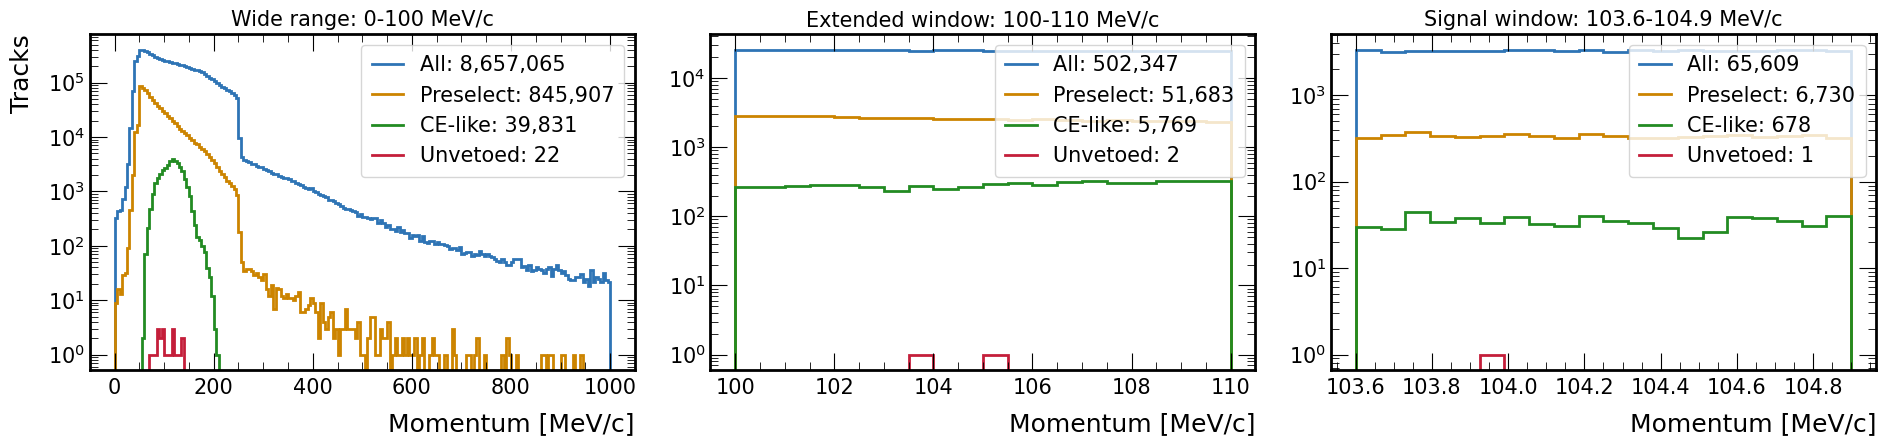

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020d_CRY_offspill-LH_as/h1o_3x3_summary.png


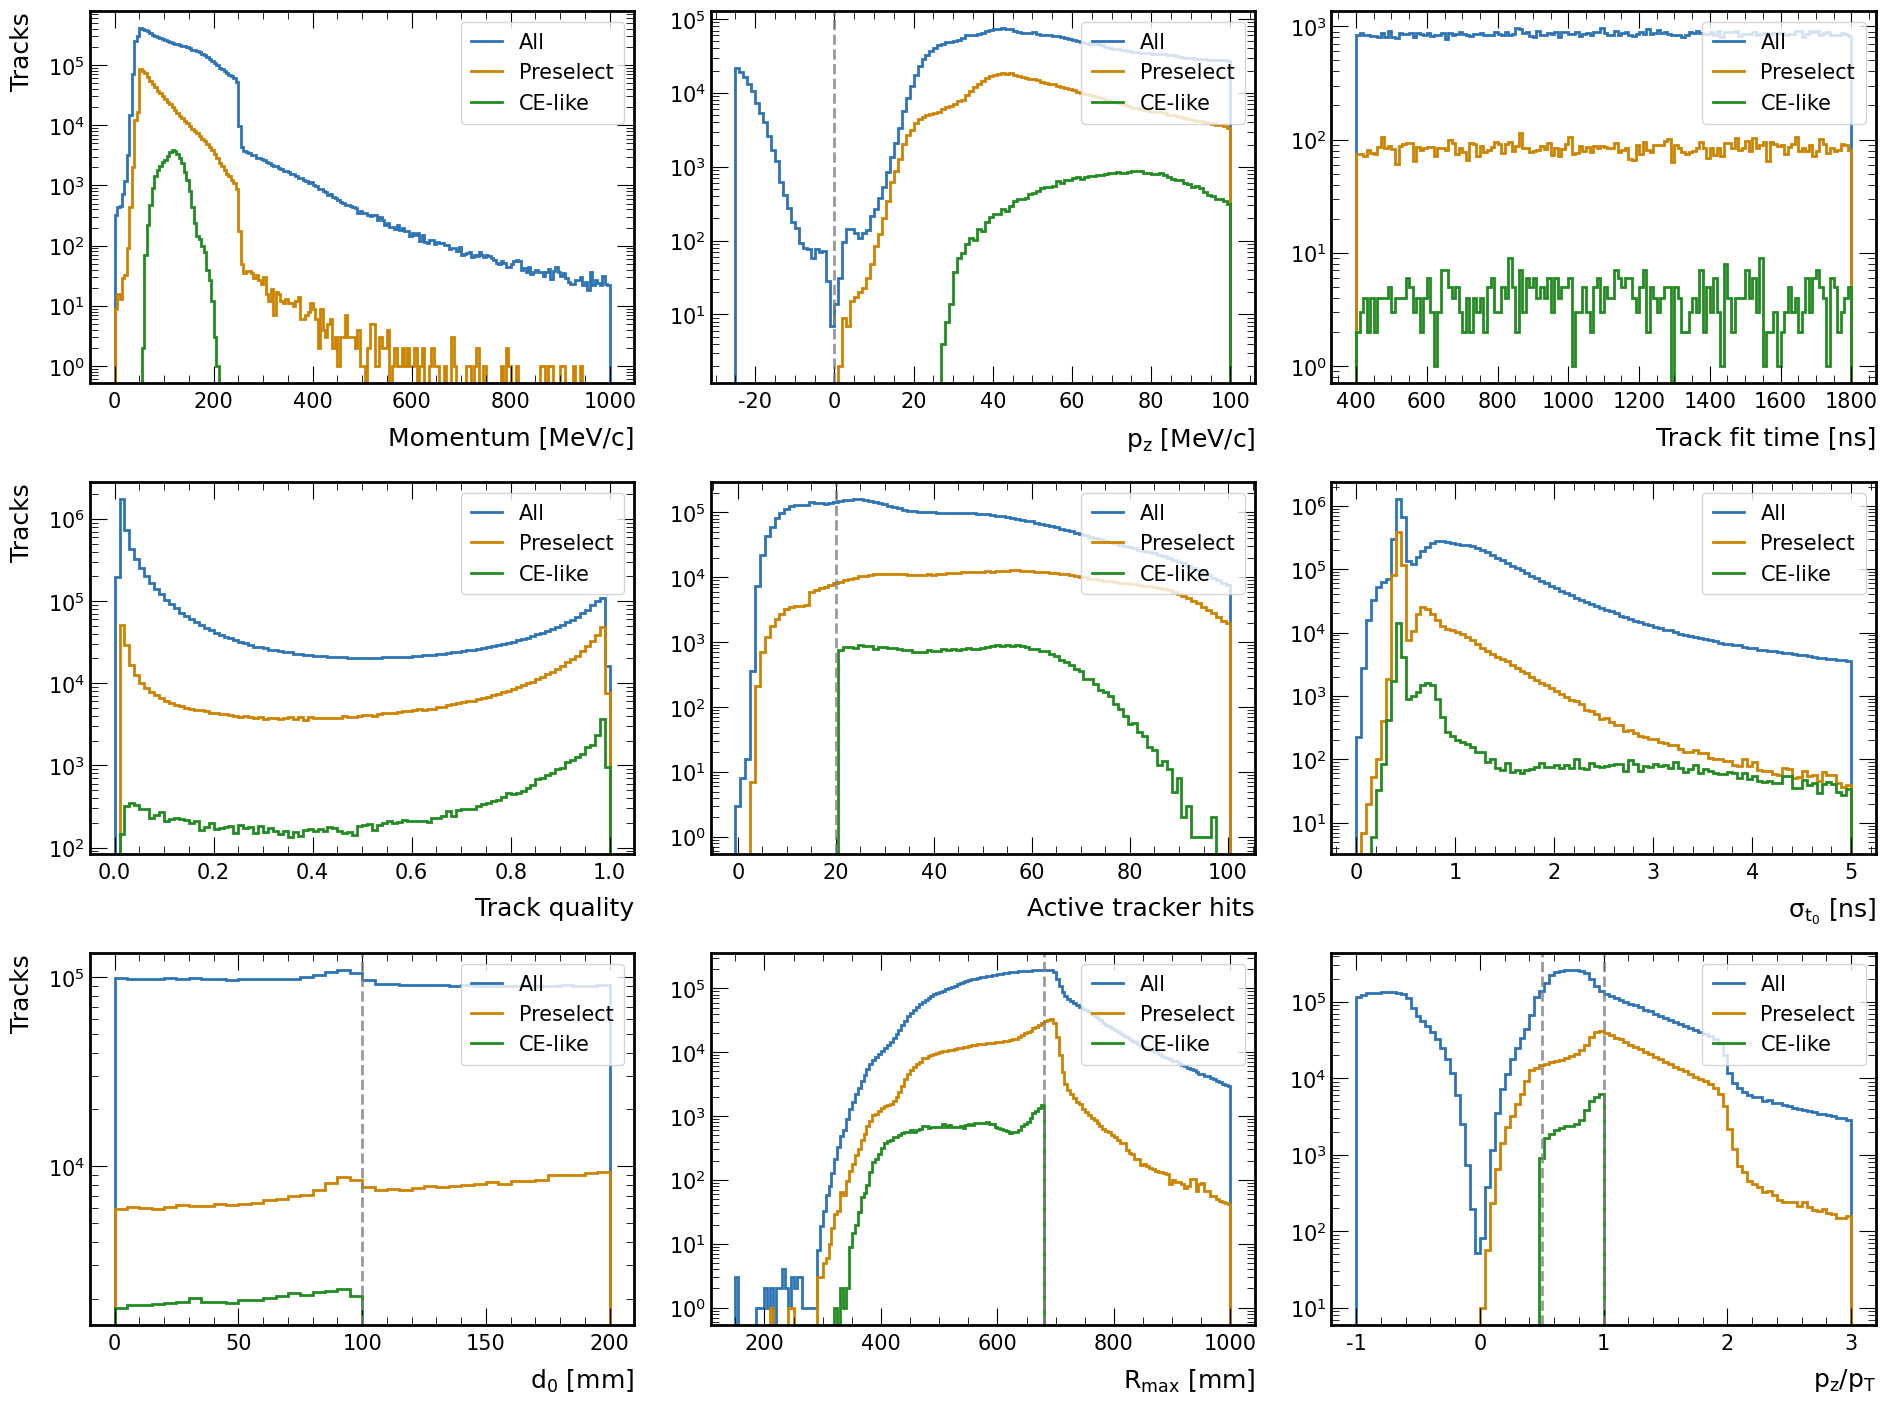

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020d_CRY_offspill-LH_as/h1o_crv_z.png


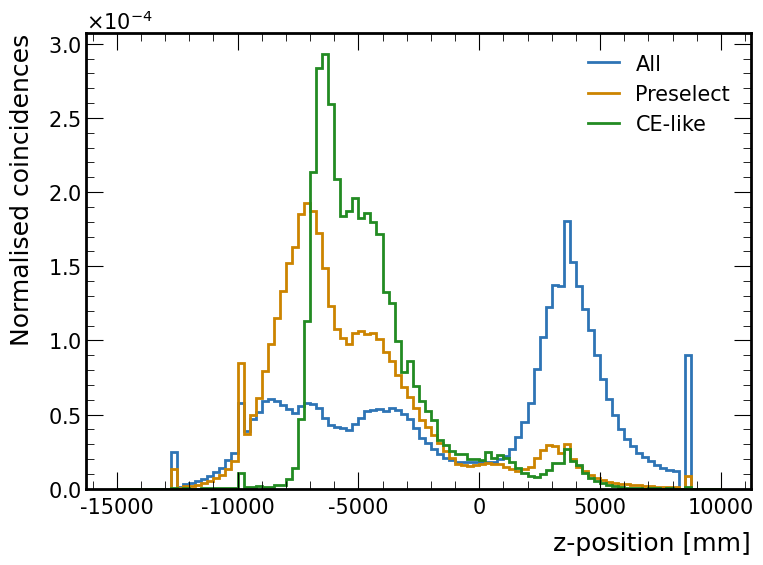

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

  Index:            10
  Subrun:           [3597]
  Event:            [6176]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000038.root
  Track time [ns]:  27504.936341
  Coinc time [ns]:  27323.162109
  dt [ns]:          181.774232
----------------------------------------
  Index:            54
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000034.root
  Track time [ns]:  31513.982908
  Coinc time [ns]:  31359.072266
  dt [ns]:          154.910643
----------------------------------------
  Index:            72
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  59076.573926
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:  

In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 22 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3597
evt.event: 6176
crv.crvcoincs.time: [2.73e+04]
crv.crvcoincs.nHits: [16]
crv.crvcoincs.pos.fCoordinates.fZ: [3.41e+03]
at_trk_front: [[False, False, False, False, False, ..., False, True, False, False], ...]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, False, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, True]
good_trkqual: [False, False, False, False]
has_hits: [True, True, True, True]
within_t0err: [False, False, True, False]
within_d0: [True, True, True, True]
pitch_angle: [[-0.212, -0.212, -0.213, -0.214, -0.214, ..., 0.502, 0.662, 0.671, 0.681], ...]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angl